## Polynomial Regression

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Generating Data for Polynomial Regression - Quadratic Equation y=0.5*x^2+1.5*x+2 with some noise/outliers
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)

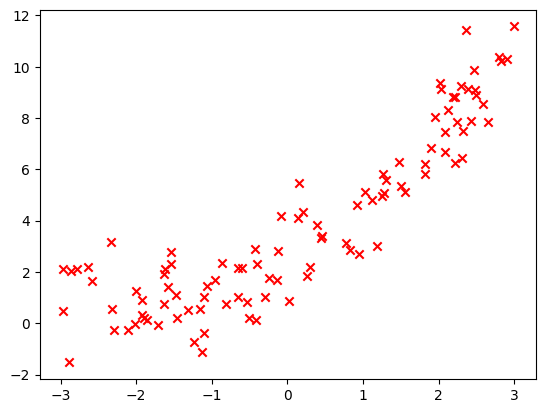

In [8]:
plt.scatter(x,y,color="red",marker="x")

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(x_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
y_pred=lc.predict(x_test)
print("R2 Score: ",r2_score(y_test,y_pred))


R2 Score:  0.7239869462444615


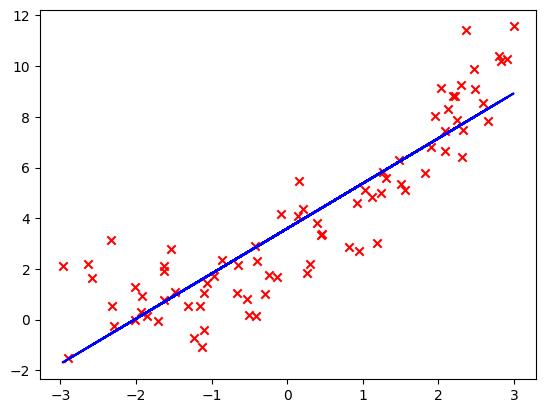

In [12]:
plt.plot(x_train,lc.predict(x_train),color="blue")
plt.scatter(x_train,y_train,color="red",marker="x")


In [13]:
# Applying Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [15]:
print(x_train_poly)

[[ 1.00000000e+00 -5.30421987e-01  2.81347484e-01]
 [ 1.00000000e+00 -1.10257391e+00  1.21566924e+00]
 [ 1.00000000e+00 -1.92736034e+00  3.71471790e+00]
 [ 1.00000000e+00  2.32326687e+00  5.39756896e+00]
 [ 1.00000000e+00 -2.31721400e+00  5.36948071e+00]
 [ 1.00000000e+00  1.95880100e+00  3.83690135e+00]
 [ 1.00000000e+00  1.82175456e+00  3.31878967e+00]
 [ 1.00000000e+00 -1.23478295e+00  1.52468893e+00]
 [ 1.00000000e+00 -2.29381258e+00  5.26157617e+00]
 [ 1.00000000e+00 -2.95487717e-01  8.73129906e-02]
 [ 1.00000000e+00  2.59085353e+00  6.71252202e+00]
 [ 1.00000000e+00 -2.01388341e+00  4.05572637e+00]
 [ 1.00000000e+00  1.90106113e+00  3.61403341e+00]
 [ 1.00000000e+00  1.55267192e+00  2.41079010e+00]
 [ 1.00000000e+00  2.31346568e+00  5.35212344e+00]
 [ 1.00000000e+00  2.79489325e+00  7.81142826e+00]
 [ 1.00000000e+00 -1.06061952e+00  1.12491376e+00]
 [ 1.00000000e+00  2.04086512e-01  4.16513044e-02]
 [ 1.00000000e+00  2.24155254e+00  5.02455781e+00]
 [ 1.00000000e+00  2.08993415e+

In [17]:
print(x_test_poly)

[[ 1.00000000e+00  1.82765367e+00  3.34031795e+00]
 [ 1.00000000e+00  7.76308596e-01  6.02655036e-01]
 [ 1.00000000e+00  2.21687177e+00  4.91452042e+00]
 [ 1.00000000e+00 -5.96764451e-01  3.56127809e-01]
 [ 1.00000000e+00  2.02177458e+00  4.08757247e+00]
 [ 1.00000000e+00 -1.18369392e-01  1.40113129e-02]
 [ 1.00000000e+00 -1.53869022e+00  2.36756758e+00]
 [ 1.00000000e+00 -2.97303862e+00  8.83895861e+00]
 [ 1.00000000e+00 -1.46304833e+00  2.14051041e+00]
 [ 1.00000000e+00 -2.10229866e+00  4.41965967e+00]
 [ 1.00000000e+00 -2.77852900e+00  7.72022341e+00]
 [ 1.00000000e+00  2.48961105e+00  6.19816316e+00]
 [ 1.00000000e+00  2.44317381e-02  5.96909825e-04]
 [ 1.00000000e+00 -1.57876591e+00  2.49250179e+00]
 [ 1.00000000e+00 -8.07025997e-01  6.51290960e-01]
 [ 1.00000000e+00  1.27913315e+00  1.63618162e+00]
 [ 1.00000000e+00 -2.86363105e+00  8.20038279e+00]
 [ 1.00000000e+00 -1.89872223e+00  3.60514611e+00]
 [ 1.00000000e+00  2.39584651e+00  5.74008050e+00]
 [ 1.00000000e+00  2.42456700e+

In [18]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(x_train_poly,y_train)
ypred=lc.predict(x_test_poly)
score=r2_score(y_test,ypred)
print("R2 Score: ",score)


R2 Score:  0.9035474994593792


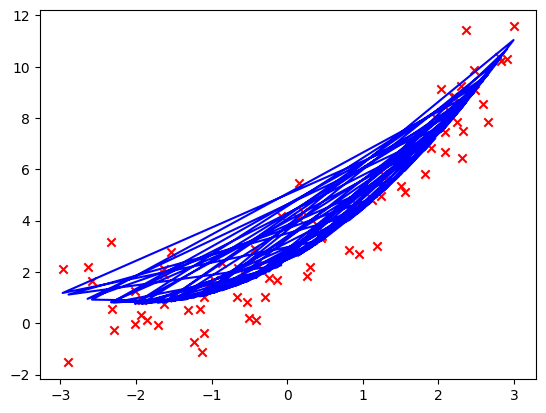

In [23]:
# Visualizing the Polynomial Regression
plt.scatter(x_train,y_train,color="red",marker="x")
plt.plot(x_train,lc.predict(x_train_poly),color="blue")


In [24]:
print(lc.intercept_)

[2.39193396]


In [27]:
# Prediction of new data
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.fit_transform(x_new)

In [29]:
y_new=lc.predict(x_new_poly)


### Pipelining

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

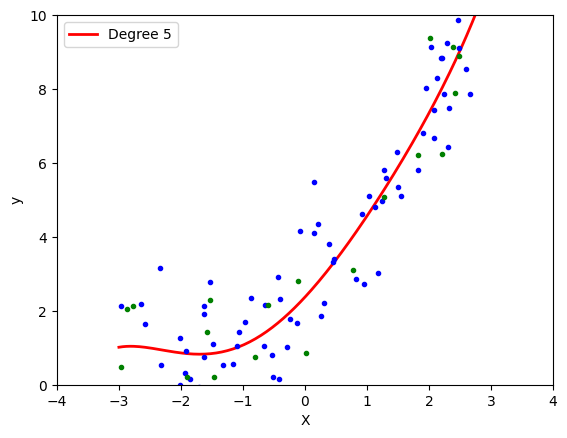

In [40]:
poly_regression(5)